<a href="https://colab.research.google.com/github/ashrafbadalof/Spotify-Project/blob/main/AML_CW_Spotify_Mood_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

from sklearn.decomposition import PCA
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors

from sklearn.cluster import DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score, davies_bouldin_score

import warnings
warnings.filterwarnings('ignore')

In [ ]:
data = pd.read_csv('/content/Spotify_Dataset_V3.csv', delimiter=';')
data.head()

,Rank,Title,Artists,Date,Danceability,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,Valence,# of Artist,Artist (Ind.),# of Nationality,Nationality,Continent,Points (Total),Points (Ind for each Artist/Nat),id,Song URL
0,1,Ella Baila Sola,"Eslabon Armado, Peso Pluma",29/05/2023,0.668,0.758,-5176.0,0.033,0.483,0.000,0.834,Artist 1,Eslabon Armado,Nationality 1,Mexico,Latin-America,200,100.0,3qQbCzHBycnDpGskqOWY0E,https://open.spotify.com/track/3qQbCzHBycnDpGs...
1,1,Ella Baila Sola,"Eslabon Armado, Peso Pluma",29/05/2023,0.668,0.758,-5176.0,0.033,0.483,0.000,0.834,Artist 2,Peso Pluma,Nationality 2,Mexico,Latin-America,200,100.0,3qQbCzHBycnDpGskqOWY0E,https://open.spotify.com/track/3qQbCzHBycnDpGs...
2,2,WHERE SHE GOES,Bad Bunny,29/05/2023,0.652,0.800,-4019.0,0.061,0.143,0.629,0.234,Artist 1,Bad Bunny,Nationality 1,Puerto Rico,Latin-America,199,199.0,7ro0hRteUMfnOioTFI5TG1,https://open.spotify.com/track/7ro0hRteUMfnOio...
3,3,La Bebe - Remix,"Yng Lvcas, Peso Pluma",29/05/2023,0.812,0.479,-5678.0,0.333,0.213,0.000,0.559,Artist 1,Yng Lvcas,Nationality 1,Mexico,Latin-America,198,99.0,2UW7JaomAMuX9pZrjVpHAU,https://open.spotify.com/track/2UW7JaomAMuX9pZ...
4,3,La Bebe - Remix,"Yng Lvcas, Peso Pluma",29/05/2023,0.812,0.479,-5678.0,0.333,0.213,0.000,0.559,Artist 2,Peso Pluma,Nationality 2,Mexico,Latin-America,198,99.0,2UW7JaomAMuX9pZrjVpHAU,https://open.spotify.com/track/2UW7JaomAMuX9pZ...


In [ ]:
data.describe()

,Rank,Danceability,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,Valence,Points (Total),Points (Ind for each Artist/Nat)
count,651936.000000,651936.000000,651936.000000,651936.000000,651936.000000,651936.000000,651936.000000,651936.000000,651936.000000,651936.000000
mean,100.407782,0.697730,0.652049,-5295.645217,0.109946,0.230694,0.007647,0.523134,100.592218,72.391141
std,57.406664,0.133186,0.155684,2785.261321,0.096841,0.230710,0.054724,0.223926,57.406664,54.227892
min,1.000000,0.073000,0.005000,-34475.000000,0.022000,0.000000,0.000000,0.026000,1.000000,0.200000
25%,51.000000,0.617000,0.549000,-6825.000000,0.045000,0.048000,0.000000,0.356000,51.000000,28.000000
50%,100.000000,0.719000,0.671000,-5206.000000,0.068000,0.152000,0.000000,0.521000,101.000000,60.000000
75%,150.000000,0.793000,0.771000,-3885.000000,0.136000,0.349000,0.000000,0.696000,150.000000,104.000000
max,200.000000,0.985000,0.996000,1509.000000,0.966000,0.994000,0.956000,0.982000,200.000000,200.000000


In [ ]:
data['Loudness'].head(10)

,Loudness
0,-5176.0
1,-5176.0
2,-4019.0
3,-5678.0
4,-5678.0
5,-8332.0
6,-4076.0
7,-4076.0
8,-4325.0
9,-9475.0


In [ ]:
# In original Spotify data Loudness feature is around -60dB to 0 dB
# These values in our column are scaled (multiplied by 1000), so we divide them by 1000 to make it right

data['Loudness_fixed'] = data['Loudness'] / 1000
data['Loudness_fixed'].head(10)

,Loudness_fixed
0,-5.176
1,-5.176
2,-4.019
3,-5.678
4,-5.678
5,-8.332
6,-4.076
7,-4.076
8,-4.325
9,-9.475


In [ ]:
data.head(2)

,Rank,Title,Artists,Date,Danceability,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,...,# of Artist,Artist (Ind.),# of Nationality,Nationality,Continent,Points (Total),Points (Ind for each Artist/Nat),id,Song URL,Loudness_fixed
0,1,Ella Baila Sola,"Eslabon Armado, Peso Pluma",29/05/2023,0.668,0.758,-5176.0,0.033,0.483,0.0,...,Artist 1,Eslabon Armado,Nationality 1,Mexico,Latin-America,200,100.0,3qQbCzHBycnDpGskqOWY0E,https://open.spotify.com/track/3qQbCzHBycnDpGs...,-5.176
1,1,Ella Baila Sola,"Eslabon Armado, Peso Pluma",29/05/2023,0.668,0.758,-5176.0,0.033,0.483,0.0,...,Artist 2,Peso Pluma,Nationality 2,Mexico,Latin-America,200,100.0,3qQbCzHBycnDpGskqOWY0E,https://open.spotify.com/track/3qQbCzHBycnDpGs...,-5.176


In [ ]:
unique_songs_ = data.drop_duplicates(subset=['Title', 'Artists']).reset_index(drop=True)
unique_songs_.shape

(7801, 21)

In [ ]:
unique_songs_.head()

,Rank,Title,Artists,Date,Danceability,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,...,# of Artist,Artist (Ind.),# of Nationality,Nationality,Continent,Points (Total),Points (Ind for each Artist/Nat),id,Song URL,Loudness_fixed
0,1,Ella Baila Sola,"Eslabon Armado, Peso Pluma",29/05/2023,0.668,0.758,-5176.0,0.033,0.483,0.000,...,Artist 1,Eslabon Armado,Nationality 1,Mexico,Latin-America,200,100.0,3qQbCzHBycnDpGskqOWY0E,https://open.spotify.com/track/3qQbCzHBycnDpGs...,-5.176
1,2,WHERE SHE GOES,Bad Bunny,29/05/2023,0.652,0.800,-4019.0,0.061,0.143,0.629,...,Artist 1,Bad Bunny,Nationality 1,Puerto Rico,Latin-America,199,199.0,7ro0hRteUMfnOioTFI5TG1,https://open.spotify.com/track/7ro0hRteUMfnOio...,-4.019
2,3,La Bebe - Remix,"Yng Lvcas, Peso Pluma",29/05/2023,0.812,0.479,-5678.0,0.333,0.213,0.000,...,Artist 1,Yng Lvcas,Nationality 1,Mexico,Latin-America,198,99.0,2UW7JaomAMuX9pZrjVpHAU,https://open.spotify.com/track/2UW7JaomAMuX9pZ...,-5.678
3,4,Cupid - Twin Ver.,FIFTY FIFTY,29/05/2023,0.783,0.592,-8332.0,0.033,0.435,0.000,...,Artist 1,FIFTY FIFTY,Nationality 1,South Korea,Asia,197,197.0,7FbrGaHYVDmfr7KoLIZnQ7,https://open.spotify.com/track/7FbrGaHYVDmfr7K...,-8.332
4,5,un x100to,"Grupo Frontera, Bad Bunny",29/05/2023,0.569,0.724,-4076.0,0.047,0.228,0.000,...,Artist 1,Grupo Frontera,Nationality 1,Mexico,Latin-America,196,98.0,6pD0ufEQq0xdHSsRbg9LBK,https://open.spotify.com/track/6pD0ufEQq0xdHSs...,-4.076


In [ ]:
useful_features = ['Title', 'Artists', 'Danceability', 'Energy', 'Loudness_fixed', 'Speechiness',
                   'Acousticness', 'Instrumentalness', 'Valence', 'Song URL']

In [ ]:
sp_data = unique_songs_[useful_features]
sp_data.head()

,Title,Artists,Danceability,Energy,Loudness_fixed,Speechiness,Acousticness,Instrumentalness,Valence,Song URL
0,Ella Baila Sola,"Eslabon Armado, Peso Pluma",0.668,0.758,-5.176,0.033,0.483,0.000,0.834,https://open.spotify.com/track/3qQbCzHBycnDpGs...
1,WHERE SHE GOES,Bad Bunny,0.652,0.800,-4.019,0.061,0.143,0.629,0.234,https://open.spotify.com/track/7ro0hRteUMfnOio...
2,La Bebe - Remix,"Yng Lvcas, Peso Pluma",0.812,0.479,-5.678,0.333,0.213,0.000,0.559,https://open.spotify.com/track/2UW7JaomAMuX9pZ...
3,Cupid - Twin Ver.,FIFTY FIFTY,0.783,0.592,-8.332,0.033,0.435,0.000,0.726,https://open.spotify.com/track/7FbrGaHYVDmfr7K...
4,un x100to,"Grupo Frontera, Bad Bunny",0.569,0.724,-4.076,0.047,0.228,0.000,0.562,https://open.spotify.com/track/6pD0ufEQq0xdHSs...


In [ ]:
sp_data.shape

(7801, 10)

In [ ]:
sp_data['Song URL'][0]

'https://open.spotify.com/track/3qQbCzHBycnDpGskqOWY0E'

In [ ]:
sp_data.to_csv('spotify_data.csv', index=False)

## Creating Models

In [1]:
data = pd.read_csv('spotify_data.csv')
data.head(), data.shape

(               Title                     Artists  Danceability  Energy  \
 0    Ella Baila Sola  Eslabon Armado, Peso Pluma         0.668   0.758   
 1     WHERE SHE GOES                   Bad Bunny         0.652   0.800   
 2    La Bebe - Remix       Yng Lvcas, Peso Pluma         0.812   0.479   
 3  Cupid - Twin Ver.                 FIFTY FIFTY         0.783   0.592   
 4          un x100to   Grupo Frontera, Bad Bunny         0.569   0.724   
 
    Loudness_fixed  Speechiness  Acousticness  Instrumentalness  Valence  \
 0          -5.176        0.033         0.483             0.000    0.834   
 1          -4.019        0.061         0.143             0.629    0.234   
 2          -5.678        0.333         0.213             0.000    0.559   
 3          -8.332        0.033         0.435             0.000    0.726   
 4          -4.076        0.047         0.228             0.000    0.562   
 
                                             Song URL  
 0  https://open.spotify.com/track

In [2]:
data['Title'].nunique()

7456

In [3]:
# even though title names are the same, artists are different, so we are good to keep these rows
duplicates = data[data.duplicated(subset = ['Title'], keep = False)]
duplicates_sorted = duplicates.sort_values(by='Title')
duplicates_sorted[['Title', 'Artists']].head(10)

,Title,Artists
1225,#NAME?,j-hope
3365,#NAME?,Dalex
1209,"1, 2, 3 (feat. Jason Derulo & De La Ghetto)","Sofía Reyes, Jason Derulo, De La Ghetto"
5869,"1, 2, 3 (feat. Jason Derulo & De La Ghetto)",Sofía Reyes
4680,2002,"Sido, Apache 207"
3820,2002,Anne-Marie
3444,777,Joji
2024,777,"Bruno Mars, Anderson .Paak, Silk Sonic"
3824,911,Lady Gaga
3475,911,Damso


In [4]:
numerical_features = ['Danceability', 'Energy', 'Loudness_fixed', 'Speechiness',
                      'Acousticness', 'Instrumentalness', 'Valence']

X = data[numerical_features].copy()
X.head()

,Danceability,Energy,Loudness_fixed,Speechiness,Acousticness,Instrumentalness,Valence
0,0.668,0.758,-5.176,0.033,0.483,0.000,0.834
1,0.652,0.800,-4.019,0.061,0.143,0.629,0.234
2,0.812,0.479,-5.678,0.333,0.213,0.000,0.559
3,0.783,0.592,-8.332,0.033,0.435,0.000,0.726
4,0.569,0.724,-4.076,0.047,0.228,0.000,0.562


In [5]:
for col in X.columns:
  Q1 = X[col].quantile(0.25)
  Q3 = X[col].quantile(0.75)
  IQR = Q3 - Q1
  lower = Q1 - 1.5*IQR
  upper = Q3 + 1.5*IQR

  X[col] = X[col].clip(lower, upper)

In [6]:
for col in X.columns:
    Q1 = X[col].quantile(0.25)
    Q3 = X[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = X[(X[col] < lower) | (X[col] > upper)]
    print(f"{col}: {len(outliers)} outliers")

Danceability: 0 outliers
Energy: 0 outliers
Loudness_fixed: 0 outliers
Speechiness: 0 outliers
Acousticness: 0 outliers
Instrumentalness: 0 outliers
Valence: 0 outliers


In [7]:
z = np.abs(stats.zscore(X))
print((z > 3).sum())

0


In [8]:
X['Instrumentalness'].describe()

,Instrumentalness
count,7801.0
mean,0.0
std,0.0
min,0.0
25%,0.0
50%,0.0
75%,0.0
max,0.0


Formula of the Standard Scaler:
$$
z = \frac{x-\mu}{\sigma}
$$

In [9]:
X = X.drop(columns=['Instrumentalness'])

In [10]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [11]:
X_scaled_df = pd.DataFrame(X_scaled, columns = X.columns)
X_scaled_df.head()

,Danceability,Energy,Loudness_fixed,Speechiness,Acousticness,Valence
0,-0.050474,0.716041,0.194785,-0.868309,1.034999,1.528552
1,-0.159184,0.963553,0.589322,-0.612653,-0.371815,-1.120313
2,0.927908,-0.928144,0.023602,1.870862,-0.082177,0.314489
3,0.730873,-0.262220,-0.881412,-0.868309,0.836390,1.051756
4,-0.723112,0.515674,0.569885,-0.740481,-0.020111,0.327733


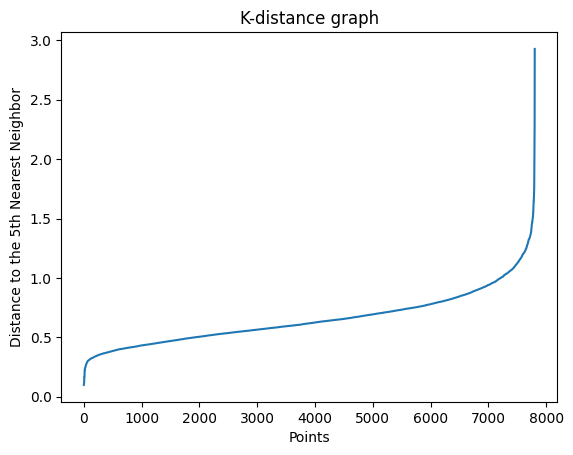

In [ ]:
# finding the optimal eps value for DBSCAN algorithm
nn = NearestNeighbors(n_neighbors=5)
nn_fitted = nn.fit(X_scaled)
distances, indices = nn_fitted.kneighbors(X_scaled)
distances = np.sort(distances[:, 4])
plt.plot(distances)

plt.ylabel('Distance to the 5th Nearest Neighbor')
plt.xlabel('Points')
plt.title('K-distance graph')
plt.show()

In [ ]:
pca = PCA(n_components = 2)
X_pca = pca.fit_transform(X_scaled)

In [ ]:
dbs = DBSCAN(eps = 1.5, min_samples = 5)
labels = dbs.fit_predict(X_pca)
X['Cluster'] = labels
X['Cluster'].value_counts()

,count
Cluster,
0,7801


In [ ]:
dbs = DBSCAN(eps = 0.5, min_samples = 5)
labels = dbs.fit_predict(X_pca)

In [ ]:
X['Cluster'] = labels
X['Cluster'].value_counts()

,count
Cluster,
0,7801


In [ ]:
X = X.drop(['Cluster'], axis = 1)

DBSCAN is not ideal for this dataset because the audio feature space is continuous and densely packed, with no clear density gaps between song groups. Since DBSCAN relies on regions of high vs. low point density to define clusters, it ends up merging most songs into one large cluster.


In [12]:
Xs = X_scaled
Ks = range(2,11)

bic_values = []
aic_values = []
for k in Ks:
  gmm = GaussianMixture(n_components = k, random_state = 42,
                        n_init = 5)
  gmm.fit(Xs)
  bic_values.append(gmm.bic(Xs))
  aic_values.append(gmm.aic(Xs))

In [13]:
aic_values

[np.float64(117909.65230334201),
 np.float64(111706.51617209404),
 np.float64(110118.49588377599),
 np.float64(108138.97806301454),
 np.float64(98149.43434615244),
 np.float64(97471.60552757423),
 np.float64(94661.37000762671),
 np.float64(94248.29547415895),
 np.float64(93592.7831838917)]

In [14]:
bic_values

[np.float64(118292.56269986936),
 np.float64(112284.36277048987),
 np.float64(110891.2786840403),
 np.float64(109106.69706514731),
 np.float64(99312.08955015369),
 np.float64(98829.19693344395),
 np.float64(96213.89761536491),
 np.float64(95995.75928376561),
 np.float64(95535.18319536684)]

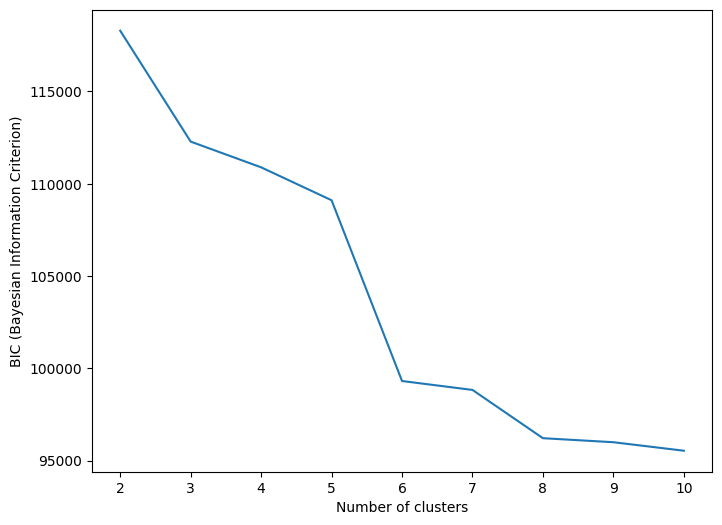

In [18]:
plt.figure(figsize = (8,6))

plt.plot(Ks, bic_values)
plt.xlabel('Number of clusters')
plt.ylabel('BIC (Bayesian Information Criterion)')
plt.show()

Although BIC values got smaller and smaller when we increased the number of clusters, we selected 4 clusters for better interpretability and to align with common mood categories in music analytics

In [20]:
X_scaled_df = pd.DataFrame(X_scaled, columns = X.columns)
X_scaled_df = X_scaled_df.copy()
X_scaled_df['Valence'] *= 1.5
X_scaled_df['Energy'] *= 1.3
X_scaled_df['Acousticness'] *= 1.2

selected_features = [
    'Danceability', 'Energy', 'Loudness_fixed',
    'Valence', 'Speechiness', 'Acousticness'
]
X_new = X_scaled_df[selected_features]

pca = PCA(n_components=3, random_state=42, svd_solver='full')
X_pca = pca.fit_transform(X_new)
print(f"Explained variance: {pca.explained_variance_ratio_.sum():.2%}")

Explained variance: 76.89%


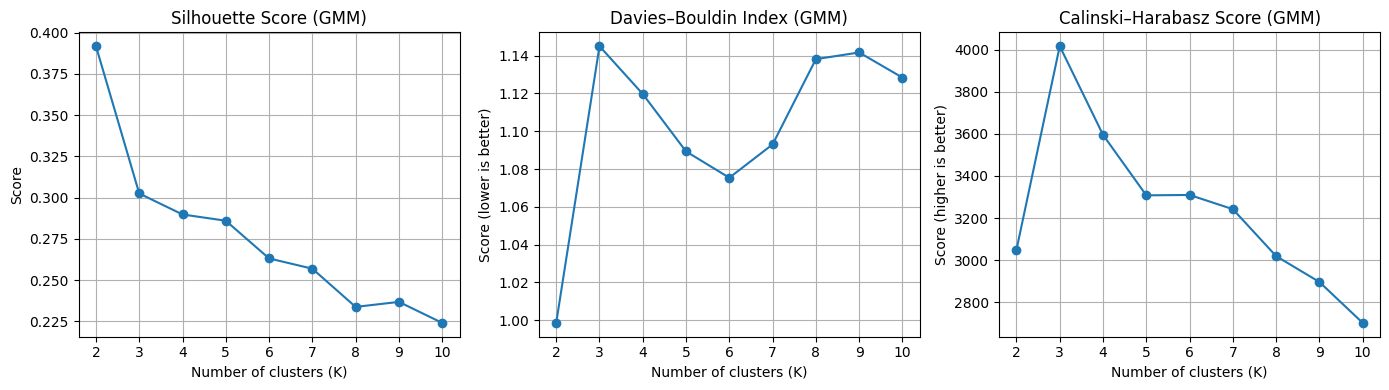

In [23]:
Ks = range(2, 11)

sil_scores = []
db_scores = []
ch_scores = []

for k in Ks:
    gmm = GaussianMixture(n_components=k, covariance_type='tied', random_state = 78, n_init = 10, reg_covar=1e-4)
    labels = gmm.fit_predict(X_pca)

    sil_scores.append(silhouette_score(X_pca, labels))
    db_scores.append(davies_bouldin_score(X_pca, labels))
    ch_scores.append(calinski_harabasz_score(X_pca, labels))

plt.figure(figsize=(14, 4))

plt.subplot(1, 3, 1)
plt.plot(Ks, sil_scores, marker='o')
plt.title("Silhouette Score (GMM)")
plt.xlabel("Number of clusters (K)")
plt.ylabel("Score")
plt.grid(True)

plt.subplot(1, 3, 2)
plt.plot(Ks, db_scores, marker='o')
plt.title("Davies–Bouldin Index (GMM)")
plt.xlabel("Number of clusters (K)")
plt.ylabel("Score (lower is better)")
plt.grid(True)

plt.subplot(1, 3, 3)
plt.plot(Ks, ch_scores, marker='o')
plt.title("Calinski–Harabasz Score (GMM)")
plt.xlabel("Number of clusters (K)")
plt.ylabel("Score (higher is better)")
plt.grid(True)

plt.tight_layout()
plt.show()


In [21]:
gmm = GaussianMixture(n_components=4, covariance_type='tied', random_state = 78, n_init = 10, reg_covar=1e-4)

labels = gmm.fit_predict(X_pca)
proba = gmm.predict_proba(X_pca)

X_scaled_df['Clusters'] = labels
X_scaled_df['Confidence'] = proba.max(axis = 1)
X_scaled_df['Clusters'].value_counts().sort_index()

,count
Clusters,
0,1007
1,3078
2,2269
3,1447


In [22]:
sil_score = silhouette_score(X_pca, labels)
print(round(sil_score, 3))

0.29


In [ ]:
# ----> Trying with 5 clusters

# gmm = GaussianMixture(n_components=5, covariance_type='tied', random_state = 78, n_init = 10, reg_covar=1e-4)

# labels = gmm.fit_predict(X_pca)
# proba = gmm.predict_proba(X_pca)
# sil_score = silhouette_score(X_pca, labels)
# print(round(sil_score, 3))

# output  is 0.286

# -----> No major difference, so, sticking with 4 clusters

In [ ]:
# -----> Trying with 6 clusters

# gmm = GaussianMixture(n_components=6, covariance_type='tied', random_state = 78, n_init = 10, reg_covar=1e-4)

# labels = gmm.fit_predict(X_pca)
# proba = gmm.predict_proba(X_pca)
# sil_score = silhouette_score(X_pca, labels)
# print(round(sil_score, 3))

# output  is 0.263

# -----> No major difference, so, sticking with 4 clusters

In [ ]:
X_scaled_df.head()

,Danceability,Energy,Loudness_fixed,Speechiness,Acousticness,Valence,Clusters,Confidence
0,-0.050474,0.930853,0.194785,-0.868309,1.241999,2.292827,1,0.974024
1,-0.159184,1.252619,0.589322,-0.612653,-0.446178,-1.680470,2,0.892623
2,0.927908,-1.206587,0.023602,1.870862,-0.098612,0.471733,3,0.966780
3,0.730873,-0.340886,-0.881412,-0.868309,1.003668,1.577634,1,0.892076
4,-0.723112,0.670377,0.569885,-0.740481,-0.024134,0.491599,1,0.670066


In [ ]:
cluster_table = (X_scaled_df.groupby('Clusters')[['Danceability', 'Energy', 'Loudness_fixed', 'Speechiness', 'Acousticness',
                                                 'Valence']].mean().round(3))
cluster_table

,Danceability,Energy,Loudness_fixed,Speechiness,Acousticness,Valence
Clusters,,,,,,
0,-0.964,-2.000,-1.024,-0.516,2.292,-0.765
1,0.266,0.727,0.384,-0.180,-0.171,1.326
2,-0.442,0.206,0.127,-0.381,-0.466,-1.215
3,0.798,-0.477,-0.304,1.339,-0.500,-0.384


In [ ]:
X_scaled_df['Title'] = data['Title']
X_scaled_df['Artists'] = data['Artists']
X_scaled_df['Song Url'] = data['Song URL']

In [ ]:
X_scaled_df.head()

,Danceability,Energy,Loudness_fixed,Speechiness,Acousticness,Valence,Clusters,Confidence,Title,Artists,Song Url
0,-0.050474,0.930853,0.194785,-0.868309,1.241999,2.292827,1,0.974024,Ella Baila Sola,"Eslabon Armado, Peso Pluma",https://open.spotify.com/track/3qQbCzHBycnDpGs...
1,-0.159184,1.252619,0.589322,-0.612653,-0.446178,-1.680470,2,0.892623,WHERE SHE GOES,Bad Bunny,https://open.spotify.com/track/7ro0hRteUMfnOio...
2,0.927908,-1.206587,0.023602,1.870862,-0.098612,0.471733,3,0.966780,La Bebe - Remix,"Yng Lvcas, Peso Pluma",https://open.spotify.com/track/2UW7JaomAMuX9pZ...
3,0.730873,-0.340886,-0.881412,-0.868309,1.003668,1.577634,1,0.892076,Cupid - Twin Ver.,FIFTY FIFTY,https://open.spotify.com/track/7FbrGaHYVDmfr7K...
4,-0.723112,0.670377,0.569885,-0.740481,-0.024134,0.491599,1,0.670066,un x100to,"Grupo Frontera, Bad Bunny",https://open.spotify.com/track/6pD0ufEQq0xdHSs...


In [ ]:
for c in sorted(X_scaled_df['Clusters'].unique()):
    print(f"\n=== Cluster {c} ===\n")
    subset = X_scaled_df[X_scaled_df['Clusters'] == c]
    print(subset[['Title', 'Artists', 'Danceability', 'Energy', 'Valence', 'Speechiness', 'Loudness_fixed']].head(20))


=== Cluster 0 ===

                                                 Title  \
6                                             Daylight   
26                                           Acróstico   
28                                   Say Yes To Heaven   
31                                        Here With Me   
34                                              People   
39                                        Another Love   
40                                         golden hour   
41   Until I Found You (with Em Beihold) - Em Beiho...   
53         Snow On The Beach (feat. More Lana Del Rey)   
58                                            cardigan   
65                                   Tak Segampang Itu   
71                                            Abcdario   
81                                          Those Eyes   
94                                   Romantic Homicide   
98                                       Night Changes   
111                                  Someone You Lov

In [ ]:
final_df = X_scaled_df.copy()

final_df['Mood'] = final_df['Clusters'].map({
    0: 'Melancholic / Dreamy',
    1: 'Mainstream / Happy Pop',
    2: 'Chill R&B / Dark Pop',
    3: 'Party / Energetic'
})
final_df.head()

,Danceability,Energy,Loudness_fixed,Speechiness,Acousticness,Valence,Clusters,Confidence,Title,Artists,Song Url,Mood
0,-0.050474,0.930853,0.194785,-0.868309,1.241999,2.292827,1,0.974024,Ella Baila Sola,"Eslabon Armado, Peso Pluma",https://open.spotify.com/track/3qQbCzHBycnDpGs...,Mainstream / Happy Pop
1,-0.159184,1.252619,0.589322,-0.612653,-0.446178,-1.680470,2,0.892623,WHERE SHE GOES,Bad Bunny,https://open.spotify.com/track/7ro0hRteUMfnOio...,Chill R&B / Dark Pop
2,0.927908,-1.206587,0.023602,1.870862,-0.098612,0.471733,3,0.966780,La Bebe - Remix,"Yng Lvcas, Peso Pluma",https://open.spotify.com/track/2UW7JaomAMuX9pZ...,Party / Energetic
3,0.730873,-0.340886,-0.881412,-0.868309,1.003668,1.577634,1,0.892076,Cupid - Twin Ver.,FIFTY FIFTY,https://open.spotify.com/track/7FbrGaHYVDmfr7K...,Mainstream / Happy Pop
4,-0.723112,0.670377,0.569885,-0.740481,-0.024134,0.491599,1,0.670066,un x100to,"Grupo Frontera, Bad Bunny",https://open.spotify.com/track/6pD0ufEQq0xdHSs...,Mainstream / Happy Pop


In [ ]:
final_df[['Title', 'Artists', 'Confidence']][final_df['Mood'] == 'Melancholic / Dreamy'].head(30)

,Title,Artists,Confidence
6,Daylight,David Kushner,0.999591
26,Acróstico,Shakira,0.978322
28,Say Yes To Heaven,Lana Del Rey,0.999476
31,Here With Me,d4vd,0.894283
34,People,Libianca,0.920665
39,Another Love,Tom Odell,0.777713
40,golden hour,JVKE,0.694790
41,Until I Found You (with Em Beihold) - Em Beiho...,"Stephen Sanchez, Em Beihold",0.977279
53,Snow On The Beach (feat. More Lana Del Rey),"Taylor Swift, Lana Del Rey",0.999135
58,cardigan,Taylor Swift,0.627577


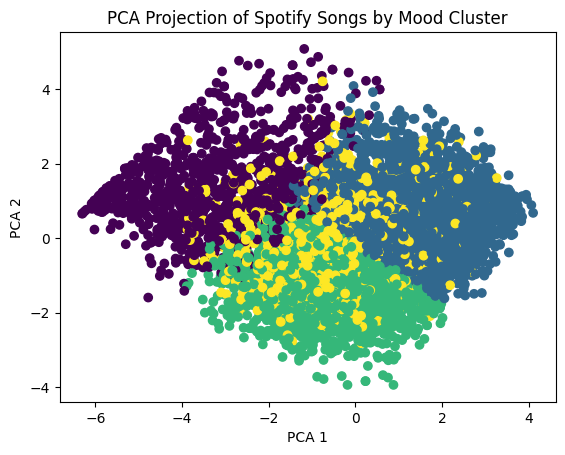

In [ ]:
plt.scatter(X_pca[:,0], X_pca[:, 1], c = X_scaled_df['Clusters'])
plt.title('PCA Projection of Spotify Songs by Mood Cluster')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

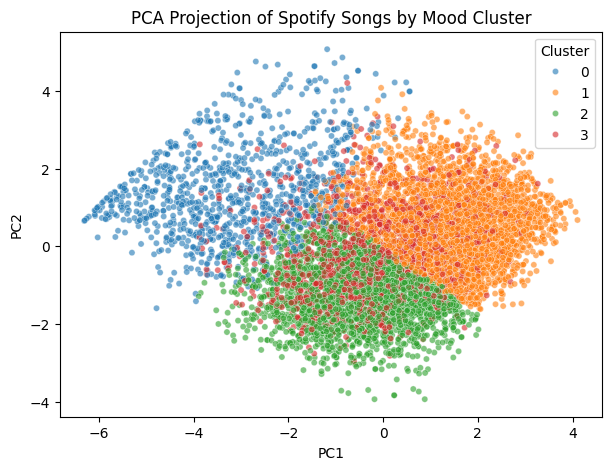

In [ ]:
pca_df = pd.DataFrame(X_pca[:, :2], columns=['PC1', 'PC2'])
pca_df['Cluster'] = X_scaled_df['Clusters']

plt.figure(figsize=(7,5))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Cluster', palette='tab10', s=20, alpha=0.6)
plt.title('PCA Projection of Spotify Songs by Mood Cluster')
plt.show()

In [ ]:
!pip install pyclustertend
from pyclustertend import hopkins
hopkins_value = hopkins(X_scaled, X_scaled.shape[0])

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.2/91.2 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 61.0 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.2
    Uninstalling pandas-2.2.2:
      Successfully uninstalled pandas-2.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.3.3 which is incompatible.


In [ ]:
hopkins_value

# If Hopkins value is less than 0.5 then the data is clusterable

np.float64(0.3045143999719218)

In [ ]:
pca = PCA()
pca.fit(X_scaled_df.drop(['Clusters', 'Confidence', 'Title', 'Artists', 'Song Url'], axis=1))

explained = np.cumsum(pca.explained_variance_ratio_) * 100
for i, v in enumerate(explained[:10], start=1):
    print(f"PC{i}: {v:.2f}%")

PC1: 40.70%
PC2: 62.40%
PC3: 76.89%
PC4: 86.51%
PC5: 94.67%
PC6: 100.00%


In [ ]:
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled_df.drop(['Clusters', 'Confidence', 'Title', 'Artists', 'Song Url'], axis=1))
print(np.cumsum(pca.explained_variance_ratio_) * 100)


[40.70089173 62.39584979 76.89476627]


In [ ]:
ch_score = calinski_harabasz_score(X_pca, labels)
db_score = davies_bouldin_score(X_pca, labels)

print(f'calinski_harabasz_score: {ch_score:.3f}')
print(f'davies_bouldin_score: {db_score:.3f}')

calinski_harabasz_score: 3595.106
davies_bouldin_score: 1.120


## Recommender System

In [ ]:
def recommend_song(song_title, data, n_recs = 3):
  song = data[data['Title'].str.lower() == song_title.lower()]
  if song.empty:
    return f'Song {song_title} is not found in the dataset'

  cluster = song['Clusters'].iloc[0]
  mood = song['Mood'].iloc[0]
  artist = song['Artists'].iloc[0]

  same_cluster = data[(data['Clusters'] == cluster) & (data['Title'].str.lower() != song_title.lower())]

  if same_cluster.empty:
    return f'No other songs found in the cluster'

  recs = same_cluster.sample(min(n_recs, len(same_cluster)))

  print(f'Mood detected: {mood}\n')
  print(f'Because you liked {song_title} by {artist}, you may also enjoy:\n')

  for _ , row in recs.iterrows():
    print(f'{row['Title']} - {row['Artists']}')
    print(f'{row['Song Url']}\n')

In [ ]:
recommend_song("The Night We Met", final_df)

Mood detected: Melancholic / Dreamy

Because you liked The Night We Met by Lord Huron, you may also enjoy:

favorite crime - Olivia Rodrigo
https://open.spotify.com/track/5JCoSi02qi3jJeHdZXMmR8

Lonely This Christmas - Mud
https://open.spotify.com/track/5DMItYJluCFc7YtFdP4aXo

Voilà - Barbara Pravi
https://open.spotify.com/track/1uAOCTevGnyKIDbgZdOCnE



In [ ]:
recommend_song("Flowers", final_df)

Mood detected: Mainstream / Happy Pop

Because you liked Flowers by Miley Cyrus, you may also enjoy:

Parada Louca - Mari Ferndez, Marcynho Sensação
https://open.spotify.com/track/72g37RoelSnovZakG5MwnF

I Want To Break Free - Single Remix - Queen
https://open.spotify.com/track/2AkmdLbVKS1steeZdy8H1l

Race My Mind - Drake
https://open.spotify.com/track/2Q3jFbyE61mCjS3SkW4toJ



In [ ]:
recommend_song("La Bebe - Remix", final_df)

Mood detected: Party / Energetic

Because you liked La Bebe - Remix by Yng Lvcas, Peso Pluma, you may also enjoy:

Faucet Failure - Ski Mask The Slump God
https://open.spotify.com/track/1ThmUihH9dF8EV08ku5AXN

Vue sur la mer - Booba, Dala
https://open.spotify.com/track/6cXNliTOTb6IrU4YhyH10J

West Coast Shit (feat. Tyga & Quavo) - Pop Smoke
https://open.spotify.com/track/1JDhNQ0oOT7XpclZn3aQ8F



In [ ]:
recommend_song("WHERE SHE GOES", final_df)

Mood detected: Chill R&B / Dark Pop

Because you liked WHERE SHE GOES by Bad Bunny, you may also enjoy:

issues - Baby Keem
https://open.spotify.com/track/7MmBhKBQnaa0I8TaDJs9ia

Oh Wow...Swerve (with J. Cole feat. Zoink Gang, KEY! & Maxo Kream) - Dreamville
https://open.spotify.com/track/7wxDKfgFtRTbupcG4xDhtj

rrow Road (feat. Lil Baby) - NLE Choppa
https://open.spotify.com/track/4LcK9e7Sls3xlBth2WuBp2



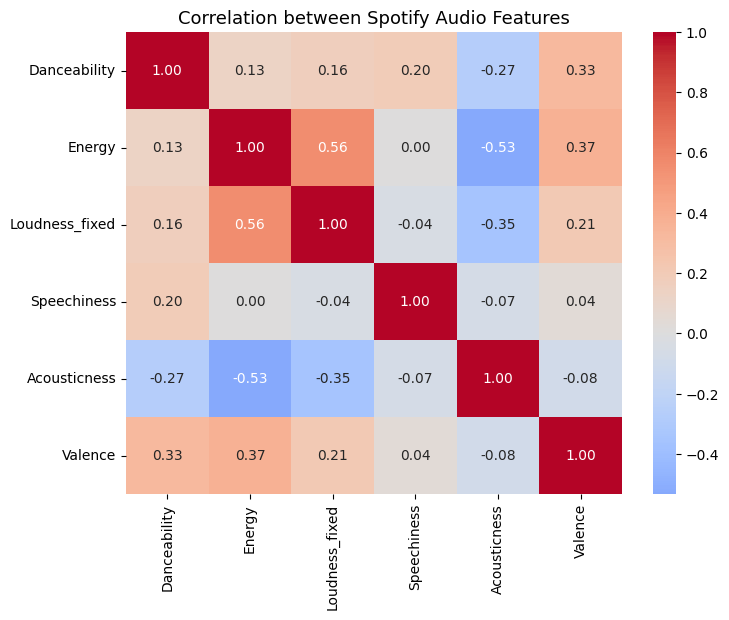

In [ ]:
features = ['Danceability', 'Energy', 'Loudness_fixed',
            'Speechiness', 'Acousticness', 'Valence']

corr = data[features].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", center=0)
plt.title("Correlation between Spotify Audio Features", fontsize=13)
plt.show()

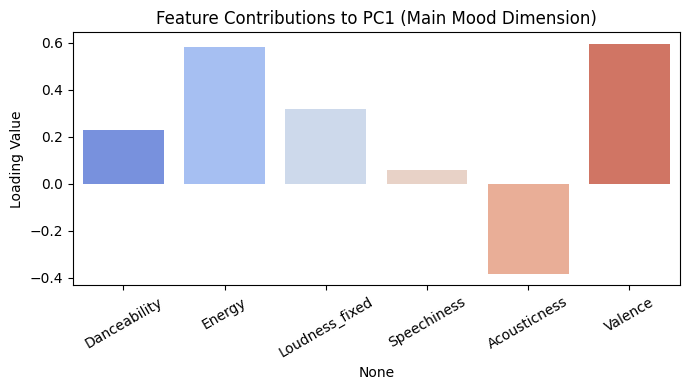

In [ ]:
loadings = pd.Series(pca.components_[0], index=X.columns)  # PC1 loadings

plt.figure(figsize=(7,4))
sns.barplot(x=loadings.index, y=loadings.values, palette='coolwarm')
plt.title('Feature Contributions to PC1 (Main Mood Dimension)')
plt.ylabel('Loading Value')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

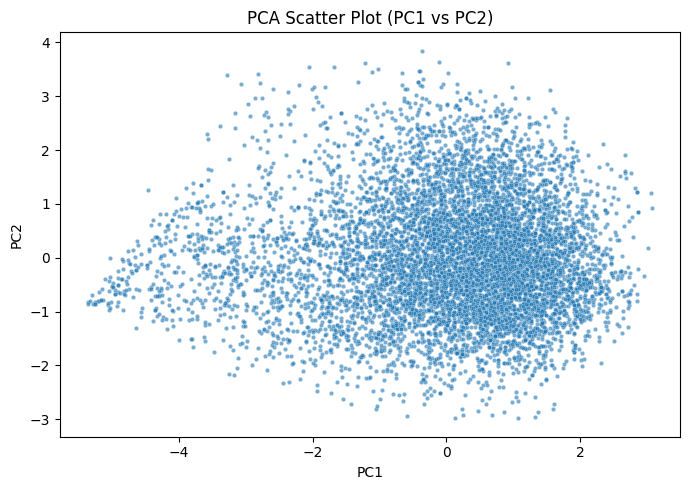

In [25]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

df_pca = pd.DataFrame({
    'PC1': X_pca[:, 0],
    'PC2': X_pca[:, 1]
})
plt.figure(figsize=(7, 5))
sns.scatterplot(data=df_pca, x='PC1', y='PC2', s=10, alpha=0.6)
plt.title('PCA Scatter Plot (PC1 vs PC2)')
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.tight_layout()
plt.show()


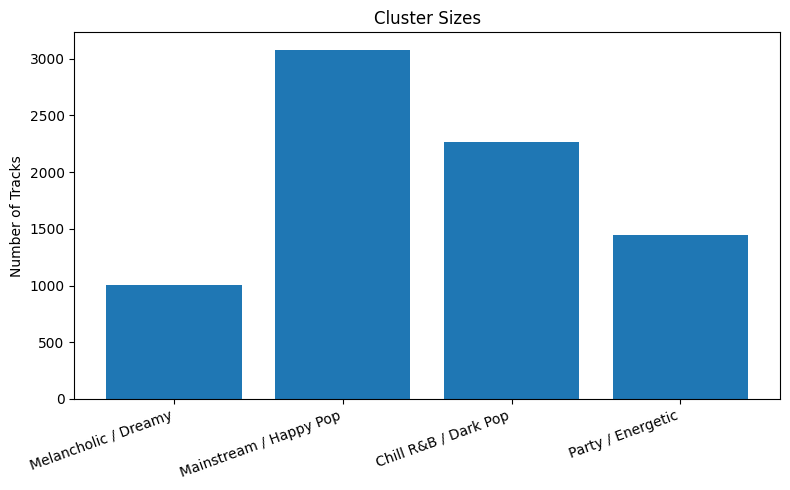

In [26]:
clusters = ["Melancholic / Dreamy", "Mainstream / Happy Pop", "Chill R&B / Dark Pop", "Party / Energetic"]
counts = [1007, 3078, 2269, 1447]

plt.figure(figsize=(8,5))
plt.bar(clusters, counts)

plt.ylabel("Number of Tracks")
plt.title("Cluster Sizes")
plt.xticks(rotation=20, ha='right')

plt.tight_layout()
plt.savefig("cluster_sizes.png", dpi=300)
plt.show()
